# 📝 Exercise M4.01

The aim of this exercise is two-fold:

* understand the parametrization of a linear model;
* quantify the fitting accuracy of a set of such models.

We will reuse part of the code of the course to:

* load data;
* create the function representing a linear model.

## Prerequisites

### Data loading

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [1]:
import pandas as pd

import pandas as pd
url = "https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/master/datasets/penguins_regression.csv"
penguins = pd.read_csv(url)
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]

### Model definition

In [2]:
def linear_model_flipper_mass(
    flipper_length, weight_flipper_length, intercept_body_mass
):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

## Main exercise

Define a vector `weights = [...]` and a vector `intercepts = [...]` of the
same length. Each pair of entries `(weights[i], intercepts[i])` tags a
different model. Use these vectors along with the vector
`flipper_length_range` to plot several linear models that could possibly fit
our data. Use the above helper function to visualize both the models and the
real samples.

Text(0.5, 1.0, 'Flipper length in function of the body mass')

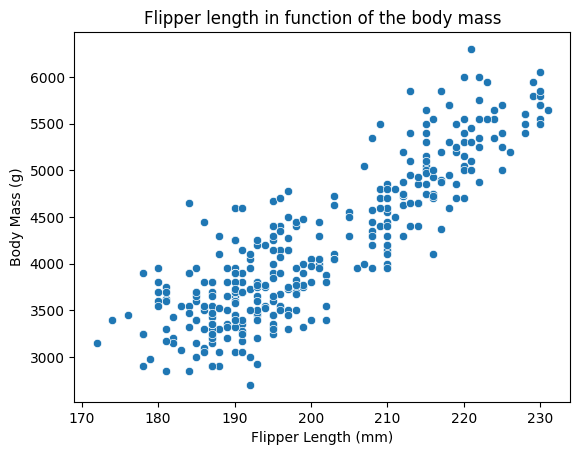

In [4]:
import seaborn as sns
ax = sns.scatterplot(x=feature_name, y=target_name, data=penguins)
ax.set_title("Flipper length in function of the body mass")

In [ ]:
import numpy as np

flipper_length_range = np.linspace(data.min(), data.max(), num=300)

In [30]:
from sklearn.linear_model import LinearRegression

# Reshape the data
X = data.values.reshape(-1, 1)
y = target.values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Get the weight (slope) and intercept
weight = model.coef_[0]
intercept = model.intercept_

print(f"Weight (slope): {weight}")
print(f"Intercept: {intercept}")

Weight (slope): 49.68556640610009
Intercept: -5780.831358077063


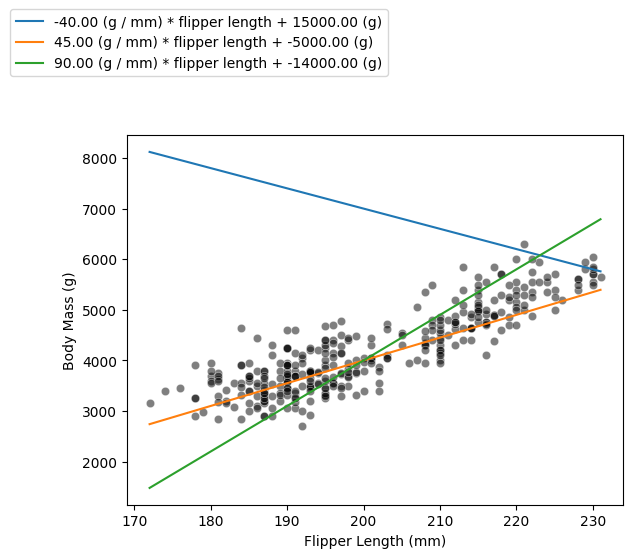

In [33]:
# Write your code here.
weights = [-40, 45, 90]
intercepts = [15000, -5000, -14000]

ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)

label = "{0:.2f} (g / mm) * flipper length + {1:.2f} (g)"
for weight, intercept in zip(weights, intercepts):
    predicted_body_mass = linear_model_flipper_mass(
        flipper_length_range, weight, intercept
    )

    ax.plot(
        flipper_length_range,
        predicted_body_mass,
        label=label.format(weight, intercept),
    )
_ = ax.legend(loc="center left", bbox_to_anchor=(-0.25, 1.25), ncol=1)

In the previous question, you were asked to create several linear models. The
visualization allowed you to qualitatively assess if a model was better than
another.

Now, you should come up with a quantitative measure which indicates the
goodness of fit of each linear model and allows you to select the best model.
Define a function `goodness_fit_measure(true_values, predictions)` that takes
as inputs the true target values and the predictions and returns a single
scalar as output.

`np.ravel` is useful when you need to convert a multi-dimensional array into a single-dimensional array for operations that require a flat array. This is useful when you want to ensure that the inputs are in a consistent format for element-wise operations, such as computing the error.

In [34]:
# Write your code here.
def goodness_fit_measure(true_values, predictions):
    '''compute error between true values and predictions'''
    error = np.ravel(predictions) - np.ravel(true_values) # ravel to handle both np.array and pd.Series
    return np.mean(np.abs(error))

You can now copy and paste the code below to show the goodness of fit for each
model.

```python
for model_idx, (weight, intercept) in enumerate(zip(weights, intercepts)):
    target_predicted = linear_model_flipper_mass(data, weight, intercept)
    print(f"Model #{model_idx}:")
    print(f"{weight:.2f} (g / mm) * flipper length + {intercept:.2f} (g)")
    print(f"Error: {goodness_fit_measure(target, target_predicted):.3f}\n")
```

In [35]:
# Write your code here.
for model_idx, (weight, intercept) in enumerate(zip(weights, intercepts)):
    target_predicted = linear_model_flipper_mass(data, weight, intercept)
    print(f"Model #{model_idx}:")
    print(f"{weight:.2f} (g / mm) * flipper length + {intercept:.2f} (g)")
    print(f"Error: {goodness_fit_measure(target, target_predicted):.3f}\n")


Model #0:
-40.00 (g / mm) * flipper length + 15000.00 (g)
Error: 2764.854

Model #1:
45.00 (g / mm) * flipper length + -5000.00 (g)
Error: 338.523

Model #2:
90.00 (g / mm) * flipper length + -14000.00 (g)
Error: 573.041

